<a href="https://colab.research.google.com/github/SallyPeter/gomycodeDSbootcamp/blob/main/ML/Unsupervised_Learning_Clustering_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What You're Aiming For

In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

**Dataset description:** This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

➡️ Dataset link

https://i.imgur.com/gAT5gVg.jpg


**Columns explanation:**

**CUST_ID:** Identification of Credit Card holder (Categorical)

**BALANCE_FREQUENCY:** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES:** Amount of purchases made from account

**CASH_ADVANCE:** Cash in advance given by the user

**CREDIT_LIMIT:**Limit of Credit Card for user

**PAYMENTS:** Amount of Payment done by user

**Instructions**

- Import you data and perform basic data exploration phase
- Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
- Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
- Perform partitional clustering using the K-means algorithm. Then, plot the clusters
- Find the best k value and plot the clusters again.
- Interpret the results

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

In [2]:
# Import you data and perform basic data exploration phase
data = pd.read_csv("Credit_card_dataset.csv")
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [4]:
data.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [5]:
# Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
data.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


In [6]:
data[data['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
5203,C15349,0.166667,0.0,9.040017,NaN,186.853063


In [7]:
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mode()[0])
data.iloc[5203]

,5203
CUST_ID,C15349
BALANCE_FREQUENCY,0.166667
PURCHASES,0.0
PAYMENTS,9.040017
CREDIT_LIMIT,3000.0
CASH_ADVANCE,186.853063


<Axes: ylabel='Frequency'>

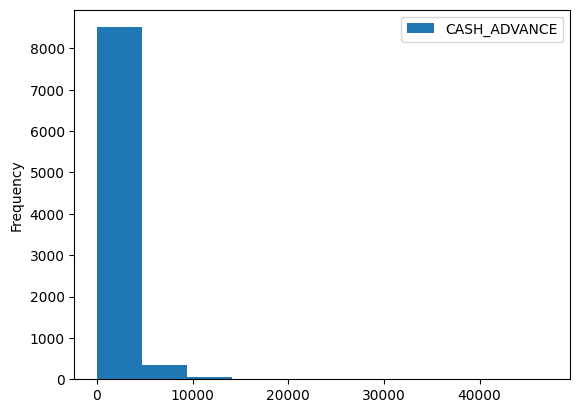

In [8]:
data.plot.hist(column=['CASH_ADVANCE'])

In [9]:
data[data['CASH_ADVANCE']>10000]

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
71,C10074,0.909091,4523.27,28232.694460,7000.0,27296.48576
133,C10139,1.000000,796.33,10664.658660,13000.0,13748.47131
182,C10188,1.000000,117.00,17301.832380,4500.0,17661.49486
248,C10257,1.000000,319.92,10993.892110,12000.0,13439.57040
274,C10285,1.000000,410.24,12005.307400,16500.0,15452.97758
...,...,...,...,...,...,...
8237,C18458,1.000000,0.00,12571.814660,3500.0,14127.46664
8315,C18536,1.000000,0.00,9818.531412,4000.0,10458.97815
8422,C18648,0.875000,0.00,7918.877416,7000.0,11951.90332
8705,C18942,1.000000,0.00,3824.308564,9000.0,10762.70776


In [10]:
data[data['CASH_ADVANCE']>20000]

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
71,C10074,0.909091,4523.27,28232.69446,7000.0,27296.48576
883,C10914,1.000000,0.00,20941.32551,18500.0,22665.77850
1059,C11094,1.000000,3719.00,28150.97869,15500.0,29282.10915
2159,C12226,1.000000,431.93,39048.59762,19600.0,47137.21176
2454,C12528,1.000000,0.00,18341.95467,15000.0,23130.82106
3806,C13914,1.000000,4995.80,20418.33238,16500.0,20712.67008
6371,C16546,0.727273,0.00,33486.31044,13000.0,21943.84942
6455,C16632,1.000000,1490.75,19740.74802,11000.0,20277.33112
7254,C17450,1.000000,1750.66,25203.91336,8500.0,26268.69989
7645,C17851,1.000000,0.00,20191.30770,9000.0,26194.04954


In [11]:
x = data.drop("CUST_ID", axis=1)
x.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000


In [12]:
# for each in x.columns:
#   x[each] = normalize(x[each])

# cols = x.columns
# x = pd.DataFrame(normalize(x), columns=cols) # ------ normalizes values per sample (row) such that the sum of their squares = 1. Does not work Columnwise and is not needed in this instance.


# apply z-score normalization
x_scaled = x.copy()
for column in x_scaled.columns:
    x_scaled[column] = (x_scaled[column] - x_scaled[column].min()) / (x_scaled[column].max() - x_scaled[column].min())
x_scaled.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,0.001945,0.003979,0.031720,0.000000
1,0.909091,0.000000,0.080893,0.232053,0.136685
2,1.000000,0.015766,0.012264,0.248748,0.000000
3,0.636364,0.030567,0.000000,0.248748,0.004366
4,1.000000,0.000326,0.013374,0.038397,0.000000


In [13]:
# Perform hierarchical clustering to identify the inherent groupings within your data.
#Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')

aggcluster = AgglomerativeClustering(n_clusters=2)
aggcluster_labels = aggcluster.fit_predict(x_scaled)


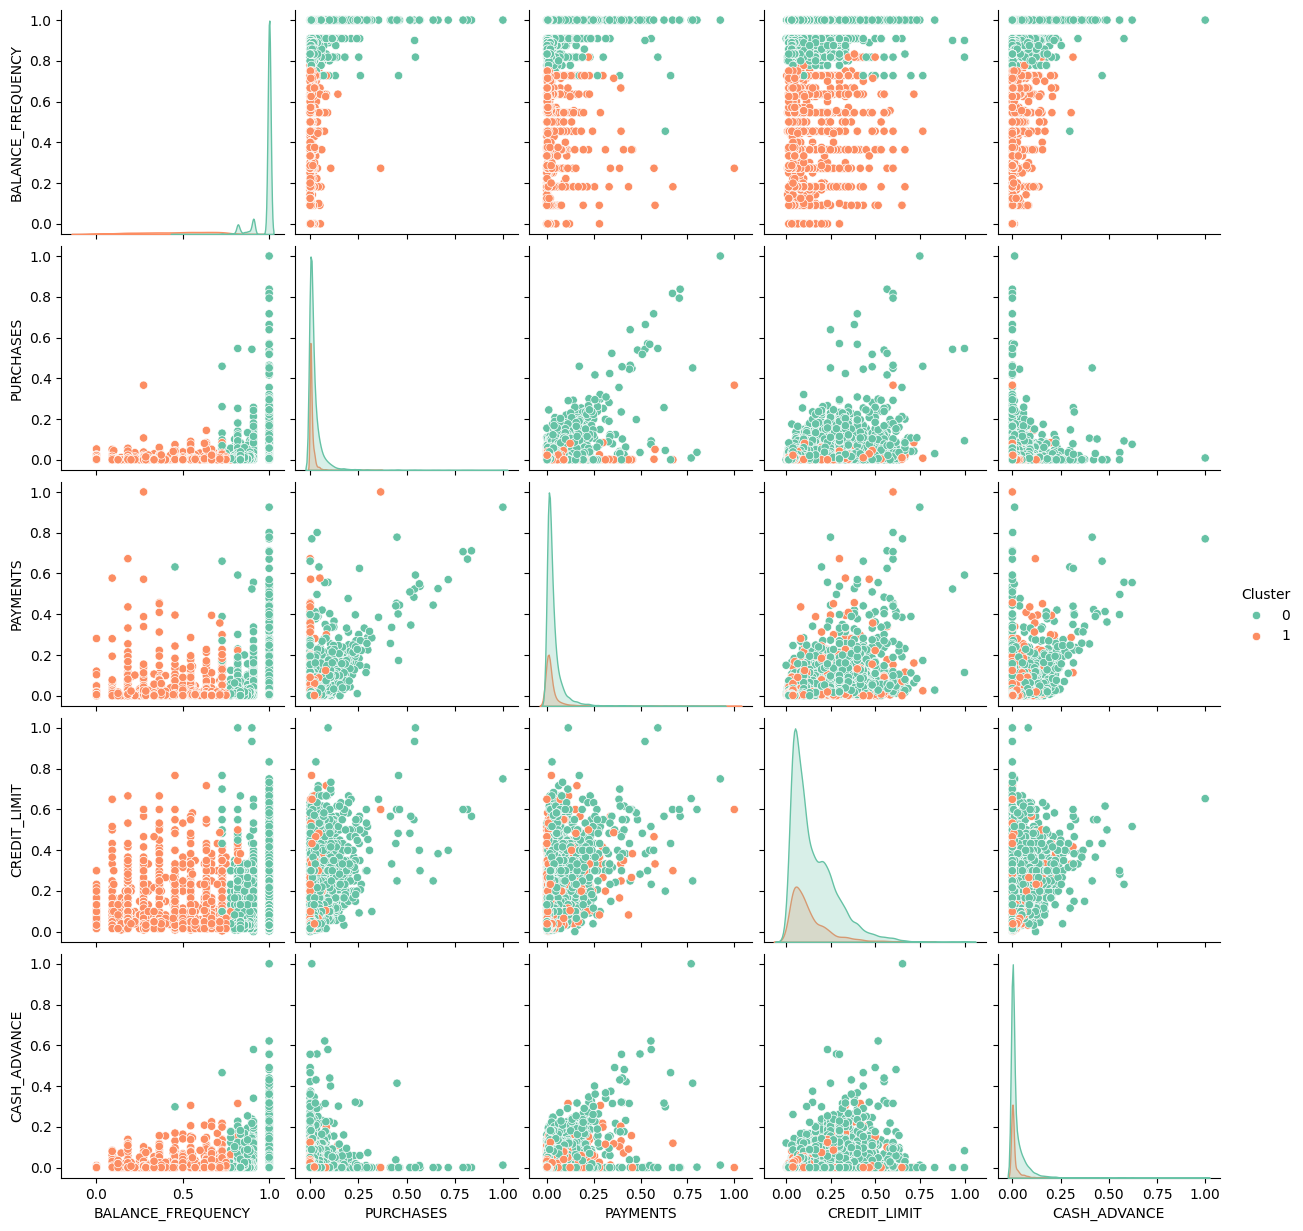

In [14]:
# The scatter plot cannot visual multidimensions properly. We try some other options to try to get an idea of the data

#Option 1 -- Seaborn's Pairplot

import seaborn as sns

x_scaled['Cluster'] = aggcluster_labels

# Create a pairplot
sns.pairplot(x_scaled, hue='Cluster', diag_kind='kde', palette='Set2')

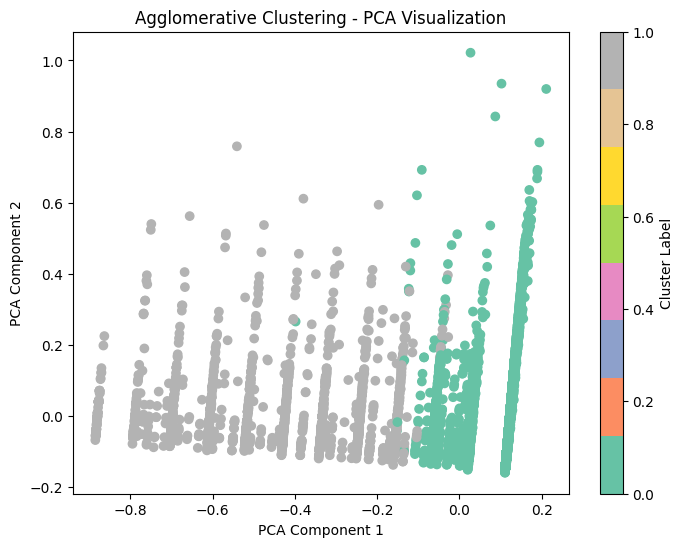

In [15]:
# Option 2 -- Using a Principal Component Analysis to reduce the features and use only the most impactful of the features, then using the scatter plot

from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled.drop(columns='Cluster'))

# Plot the clusters in the reduced PCA space
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=aggcluster_labels, cmap='Set2')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering - PCA Visualization')
plt.colorbar(label='Cluster Label')
plt.show()

As observed above, 2 clusters does not classify the data properly, hence we use a dendrogram to confirm the most appropriate number of clusters for the data

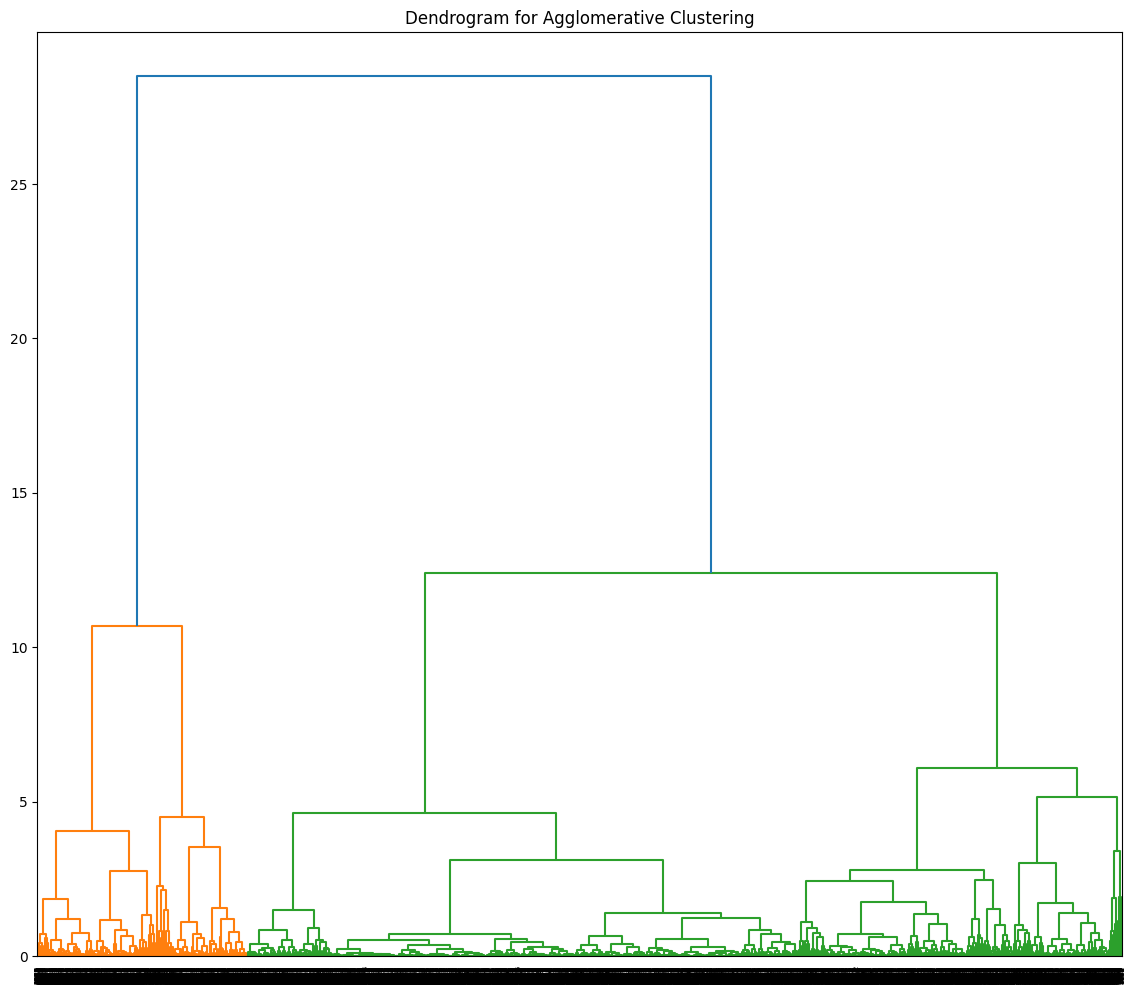

In [16]:
# Plot the dendrogram
plt.figure(figsize=(14, 12))
plt.title("Dendrogram for Agglomerative Clustering")
dend = shc.dendrogram(shc.linkage(x_scaled.drop(columns='Cluster'), method='ward'))
plt.show()

In [17]:
# Perform hierarchical clustering to identify the inherent groupings within your data.
#Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')

aggcluster = AgglomerativeClustering(n_clusters=4)
aggcluster_labels = aggcluster.fit_predict(x_scaled)


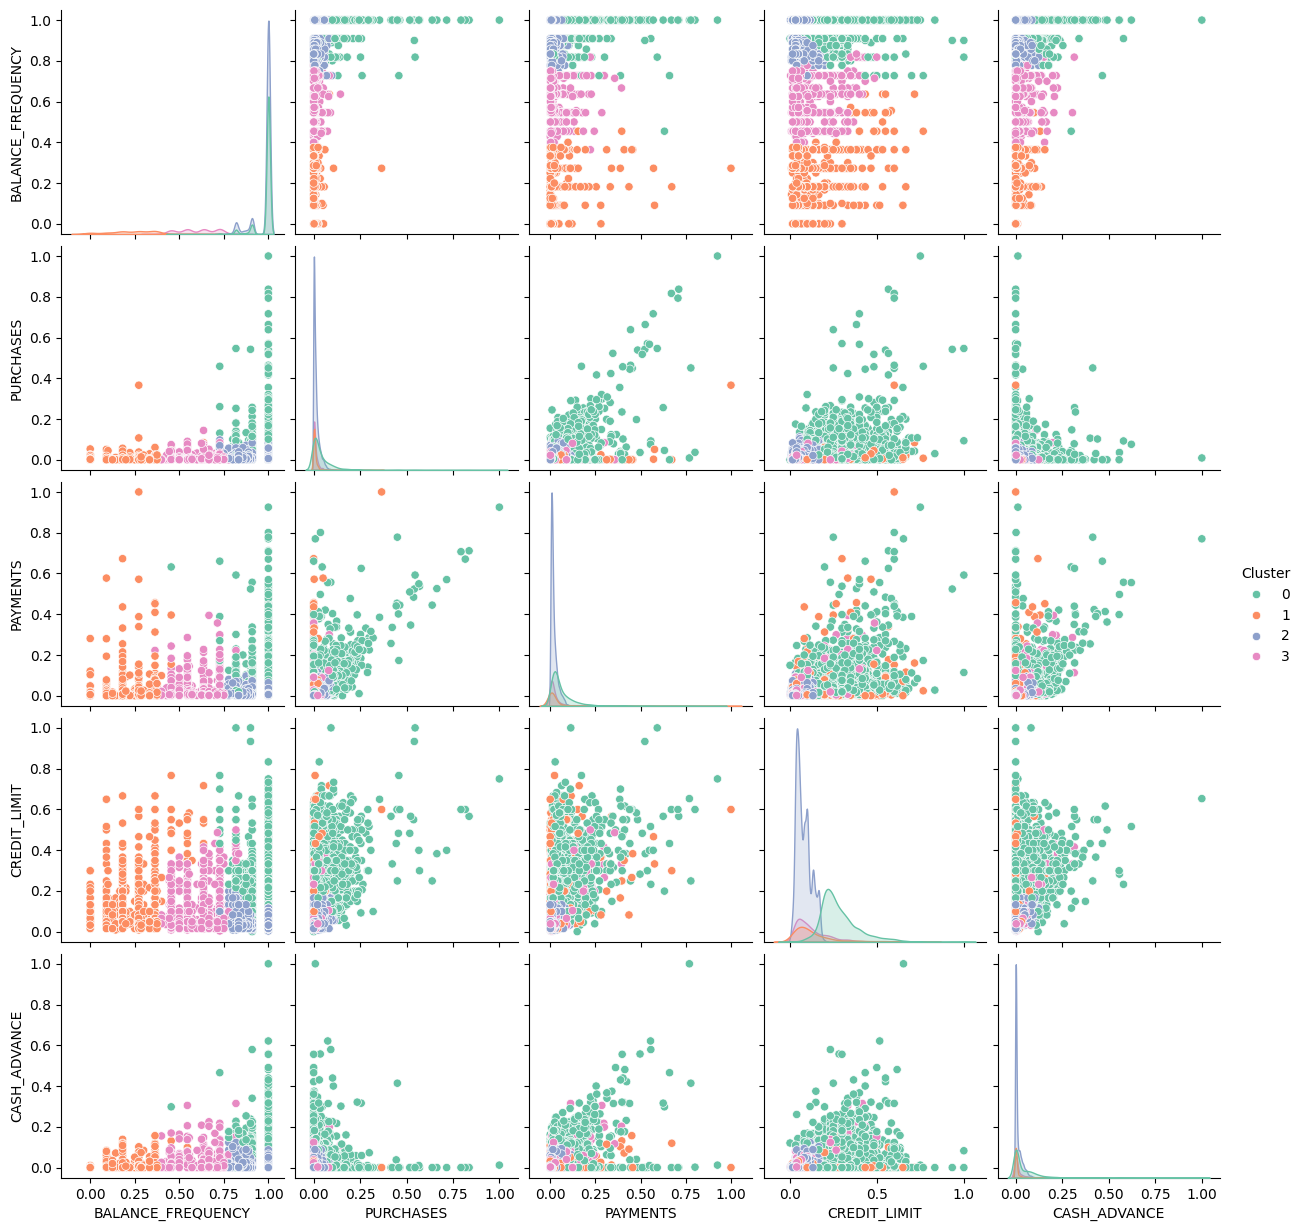

In [18]:
# The scatter plot cannot visual multidimensions properly. We try some other options to try to get an idea of the data

#Option 1 -- Seaborn's Pairplot

import seaborn as sns

x_scaled['Cluster'] = aggcluster_labels

# Create a pairplot
sns.pairplot(x_scaled, hue='Cluster', diag_kind='kde', palette='Set2')

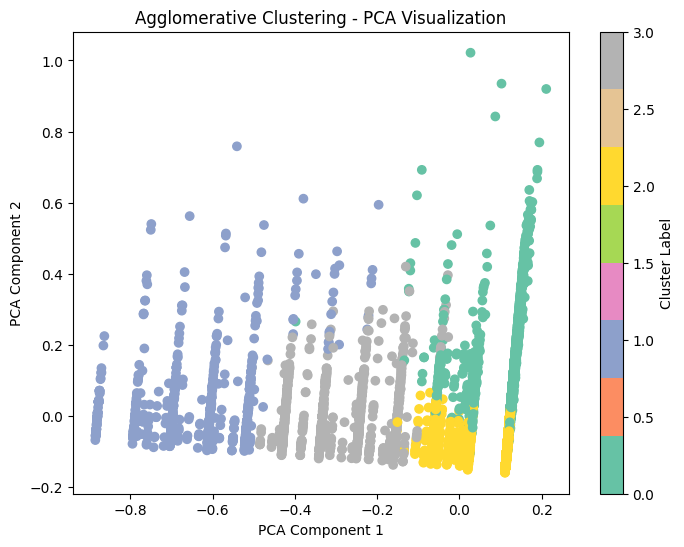

In [19]:
# Option 2 -- Using a Principal Component Analysis to reduce the features and use only the most impactful of the features, then using the scatter plot

from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled.drop(columns='Cluster'))

# Plot the clusters in the reduced PCA space
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=aggcluster_labels, cmap='Set2')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering - PCA Visualization')
plt.colorbar(label='Cluster Label')
plt.show()

In [20]:
data["agg_cluster"] = aggcluster_labels
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,agg_cluster
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000,2
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483,0
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000,0
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017,3
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000,2


In [21]:
data.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,agg_cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.282473,978.871112,1.428380
std,0.236904,2136.634782,2895.063757,3638.646702,2097.163877,1.030737
min,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000,2.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139,2.000000
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760,3.000000


In [22]:
# data[data['CREDIT_LIMIT'] >=900 data['CREDIT_LIMIT']<1000]


# data.loc[(data['CREDIT_LIMIT'] >=900) & (data['CREDIT_LIMIT']<1000)]

In [23]:
# data['CREDIT_LIMIT_GROUP'] = pd.qcut(data['CREDIT_LIMIT'], q=5, labels=['Very Low', 'Low',  'Medium', 'High', 'Very High']) --Not giving me what I want

bins = [49, 999 , 2999, 6499, 30000]  # Define bin edges
labels = ['Very Low', 'Low', 'Medium', 'High']  # Labels for the bins

# Create a new column for grouped credit limits
data['CREDIT_LIMIT_GROUP'] = pd.cut(data['CREDIT_LIMIT'], bins=bins, labels=labels)
data['CREDIT_LIMIT_Num'] = pd.cut(data['CREDIT_LIMIT'], bins=bins, labels=[0,1,2,3])

data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,agg_cluster,CREDIT_LIMIT_GROUP,CREDIT_LIMIT_Num
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000,2,Low,1
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483,0,High,3
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000,0,High,3
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017,3,High,3
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000,2,Low,1


In [24]:
import plotly.express as px


# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(data,
                    x='CREDIT_LIMIT',
                    y='PURCHASES',
                    z='PAYMENTS',
                    size_max= 30,
                    color='agg_cluster',  # Color by cluster labels
                    size='BALANCE_FREQUENCY',  # Marker size by credit limit
                    hover_data=['CASH_ADVANCE'],  # Show CASH_ADVANCE on hover
                    title='3D Scatter Plot of Customer Data')

# Show the plot
fig.show()


In [26]:
x_scaled.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,Cluster
0,0.818182,0.001945,0.003979,0.031720,0.000000,2
1,0.909091,0.000000,0.080893,0.232053,0.136685,0
2,1.000000,0.015766,0.012264,0.248748,0.000000,0
3,0.636364,0.030567,0.000000,0.248748,0.004366,3
4,1.000000,0.000326,0.013374,0.038397,0.000000,2


In [27]:
# Perform partitional clustering using the K-means algorithm. Then, plot the clusters

km = KMeans(n_clusters=2)
km_labels = km.fit_predict(x_scaled.drop("Cluster", axis=1))



In [28]:
x_scaled.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,Cluster
0,0.818182,0.001945,0.003979,0.031720,0.000000,2
1,0.909091,0.000000,0.080893,0.232053,0.136685,0
2,1.000000,0.015766,0.012264,0.248748,0.000000,0
3,0.636364,0.030567,0.000000,0.248748,0.004366,3
4,1.000000,0.000326,0.013374,0.038397,0.000000,2


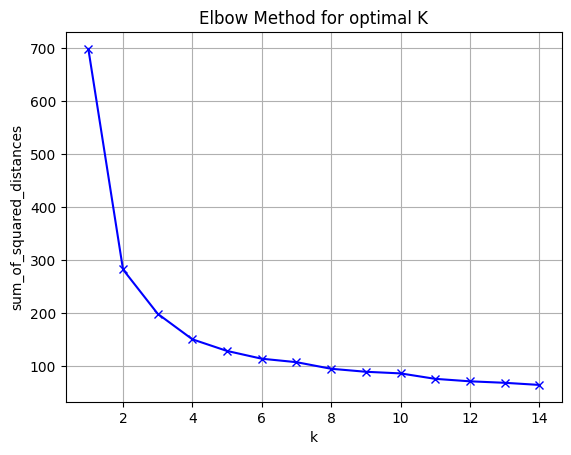

In [29]:
# Find the best k value and plot the clusters again.
sum_of_squared_distances = []
K = range(1,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(x_scaled.drop("Cluster", axis=1))
  sum_of_squared_distances.append(km.inertia_)




plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title("Elbow Method for optimal K")
plt.grid(True)
plt.show()

In [30]:
# sns.lineplot(x=K, y=sum_of_squared_distances, marker="o")

# # Customize labels and title
# plt.xlabel('k')
# plt.ylabel('Sum of Squared Distances')
# plt.title("Elbow Method for Optimal K")

# # Show the plot
# plt.show()

In [31]:
km = KMeans(n_clusters=4)
km_labels = km.fit_predict(x_scaled.drop("Cluster", axis=1))


data['km_clusters'] = km_labels

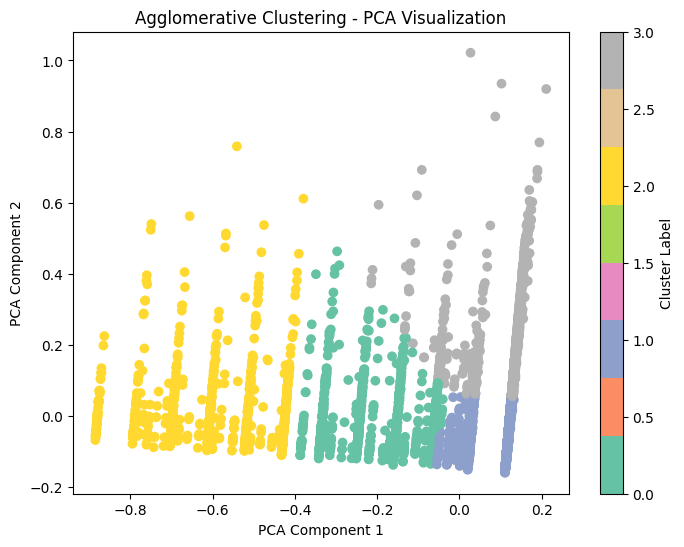

In [32]:
# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled.drop(columns='Cluster'))

# Plot the clusters in the reduced PCA space
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=km_labels, cmap='Set2')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering - PCA Visualization')
plt.colorbar(label='Cluster Label')
plt.show()

In [33]:
# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(data,
                    x='CREDIT_LIMIT',
                    y='PURCHASES',
                    z='PAYMENTS',
                    size_max= 30,
                    color='km_clusters',  # Color by cluster labels
                    size='BALANCE_FREQUENCY',  # Marker size by credit limit
                    hover_data=['CASH_ADVANCE'],  # Show CASH_ADVANCE on hover
                    title='3D Scatter Plot of Customer Data')

# Show the plot
fig.show()

In [ ]:
# Interpret the results